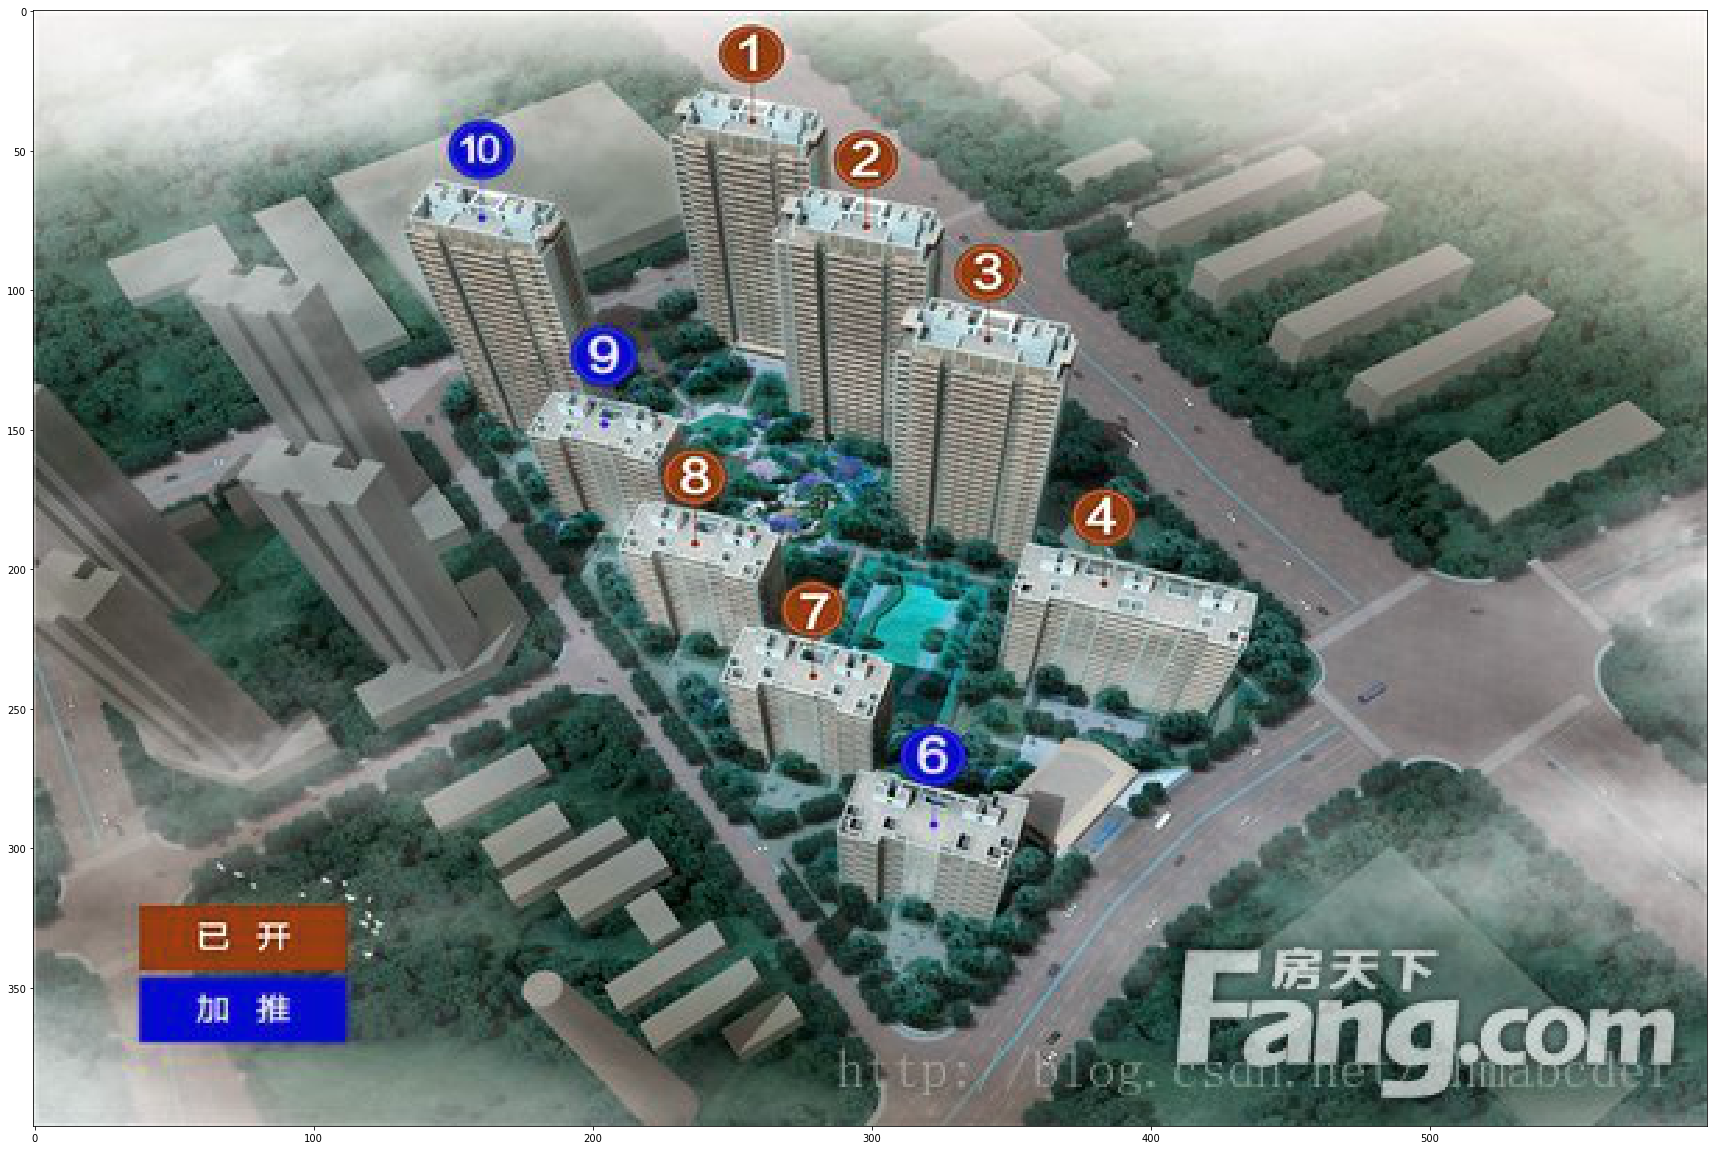

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy
#orginal image
queryImage = cv2.imread("/Users/jarvis/Documents/workspace/shuiyin/soufang_org.jpg")
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(queryImage, None)
#print("kp1,des1")
#print(kp1,des1)

# shuiyin image
trainImage = cv2.imread("/Users/jarvis/Documents/workspace/shuiyin/soufang_shuiyin.jpg")
kp2, des2 = sift.detectAndCompute(trainImage, None)
#print("kp2,des2")
#print(kp2,des2)

plt.gcf().set_size_inches(30,25)
plt.imshow(queryImage)

In [52]:
#funtion one not succeed
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
#or pass empty dictionary
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)
# 找出相匹配的特征点
for m, n in matches:
    #其中0.7参数可调
     if m.distance < 0.75 * n.distance:
         x1 = kp1[m.queryIdx].pt[0]
         y1 = kp1[m.queryIdx].pt[1]
         x2 = kp2[m.trainIdx].pt[0]
         y2 = kp2[m.trainIdx].pt[1]
         #print(x1,y1,x2,y2)
         #（x1,y1）(x2,y2)为相匹配的特征点

In [2]:
def qushuiyinfunctionone(src,mask):
    dst = cv2.inpaint(src, mask, 3, cv2.INPAINT_TELEA)
    plt.gcf().set_size_inches(30,25)
    plt.imshow(dst)
    return dst

array([[[255, 255, 254],
        [252, 250, 249],
        [250, 248, 247],
        ..., 
        [255, 253, 252],
        [255, 252, 251],
        [255, 255, 254]],

       [[254, 252, 251],
        [249, 247, 246],
        [247, 245, 244],
        ..., 
        [252, 248, 247],
        [251, 247, 246],
        [255, 254, 253]],

       [[252, 250, 249],
        [247, 245, 244],
        [244, 242, 241],
        ..., 
        [247, 243, 242],
        [247, 243, 242],
        [253, 249, 248]],

       ..., 
       [[229, 235, 234],
        [220, 226, 225],
        [212, 218, 217],
        ..., 
        [107, 127, 122],
        [104, 124, 119],
        [109, 131, 126]],

       [[224, 230, 229],
        [219, 225, 224],
        [214, 220, 219],
        ..., 
        [109, 126, 122],
        [109, 126, 122],
        [112, 129, 125]],

       [[234, 240, 239],
        [230, 236, 235],
        [225, 231, 230],
        ..., 
        [122, 137, 133],
        [120, 135, 131],
        [116, 131,

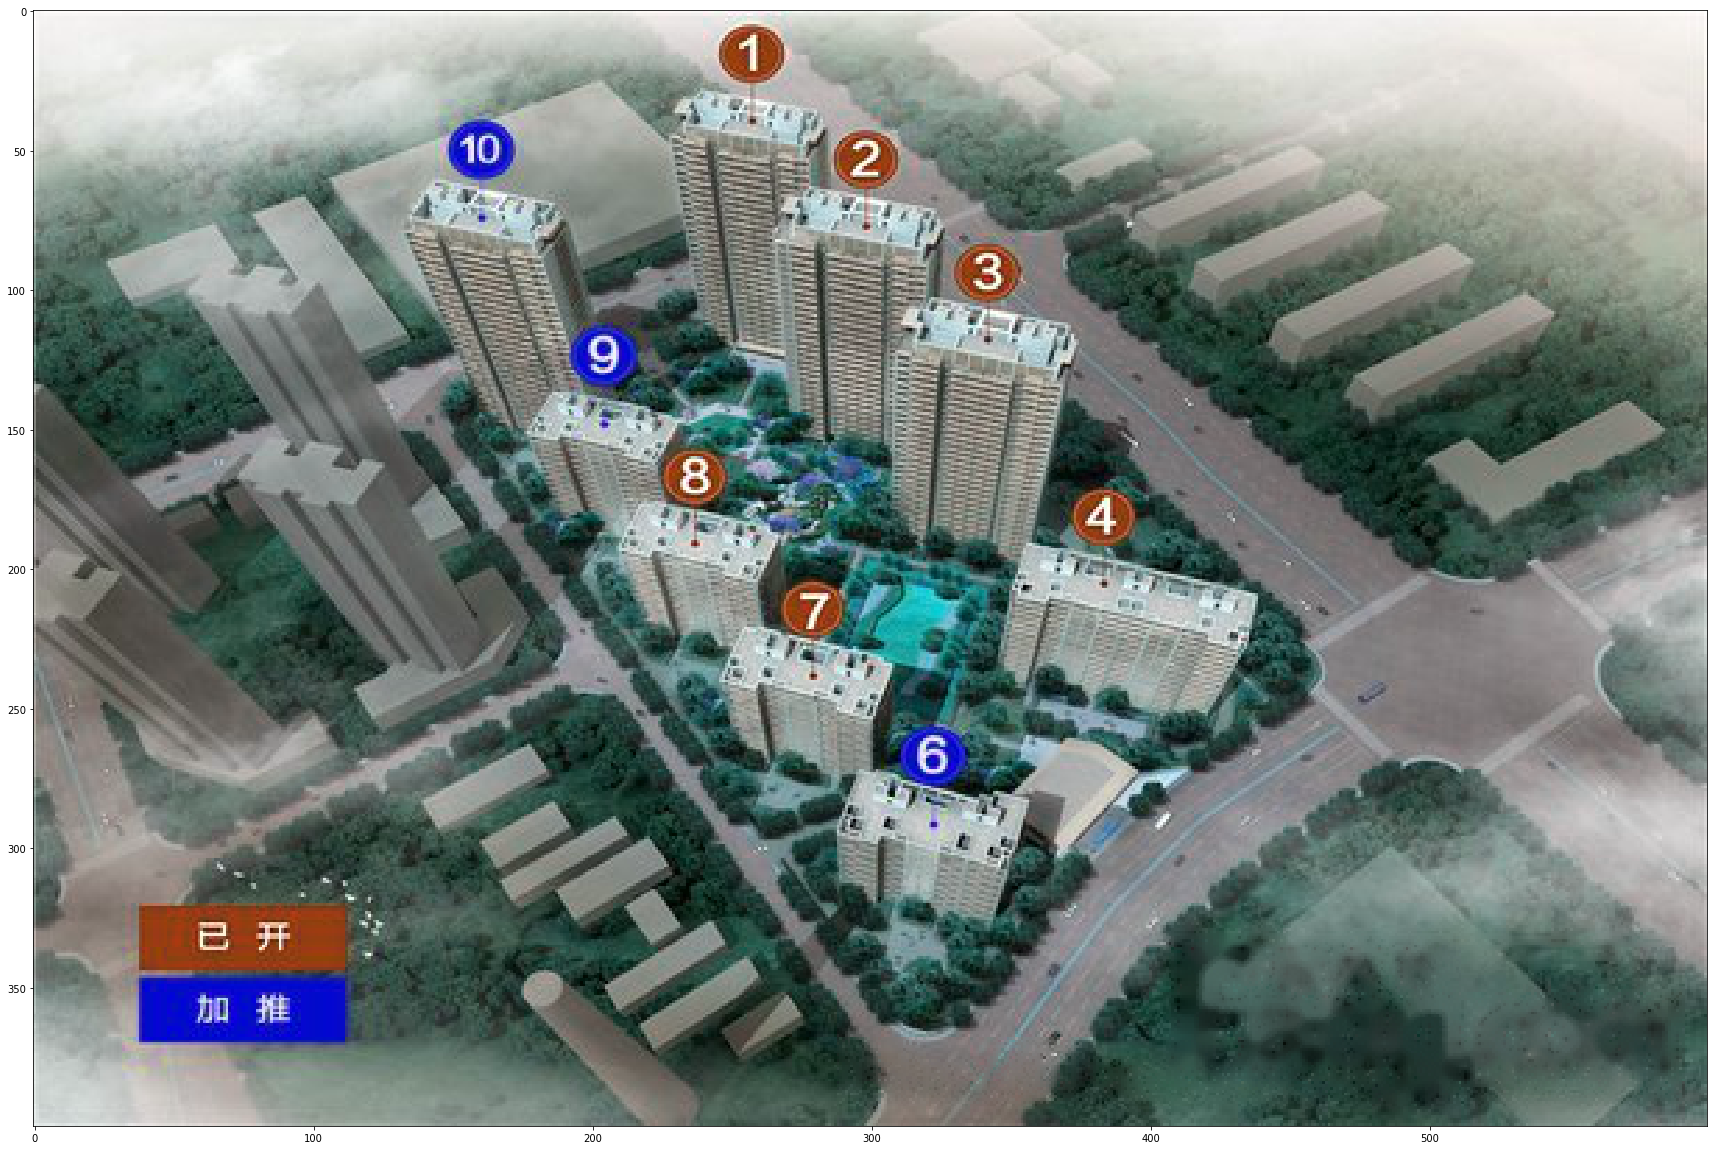

In [3]:
#function two
src = cv2.imread("/Users/jarvis/Documents/workspace/shuiyin/soufang_org.jpg")
mask = cv2.imread("/Users/jarvis/Documents/workspace/shuiyin/soufang_shuiyin.jpg", cv2.IMREAD_GRAYSCALE)
qushuiyinfunctionone(src,mask)


In [4]:
#function three
def inverse_color(image):

    height,width,temp = image.shape
    img2 = image.copy()

    for i in range(height):
        for j in range(width):
            img2[i,j] = (255-image[i,j][0],255-image[i,j][1],255-image[i,j][2]) 
    return img2
#print(mask.shape)
def qushuiyin(mask):
    save = numpy.zeros(src.shape, numpy.uint8)
    for row in range(src.shape[0]):
        for col in range(src.shape[1]):
            for channel in range(src.shape[2]):

                if mask[row, col, channel] == 0:
                    val = 0
                else:
                    reverse_val = 255 - src[row, col, channel]
                    val = 255 - reverse_val * 256 / mask[row, col, channel]
                    if val < 0:
                        val = 0
                save[row, col, channel] = val
    #cv2.imwrite(save_dir, save)
    plt.gcf().set_size_inches(30,25)
    plt.imshow(save)
    return save

(400, 600, 3)


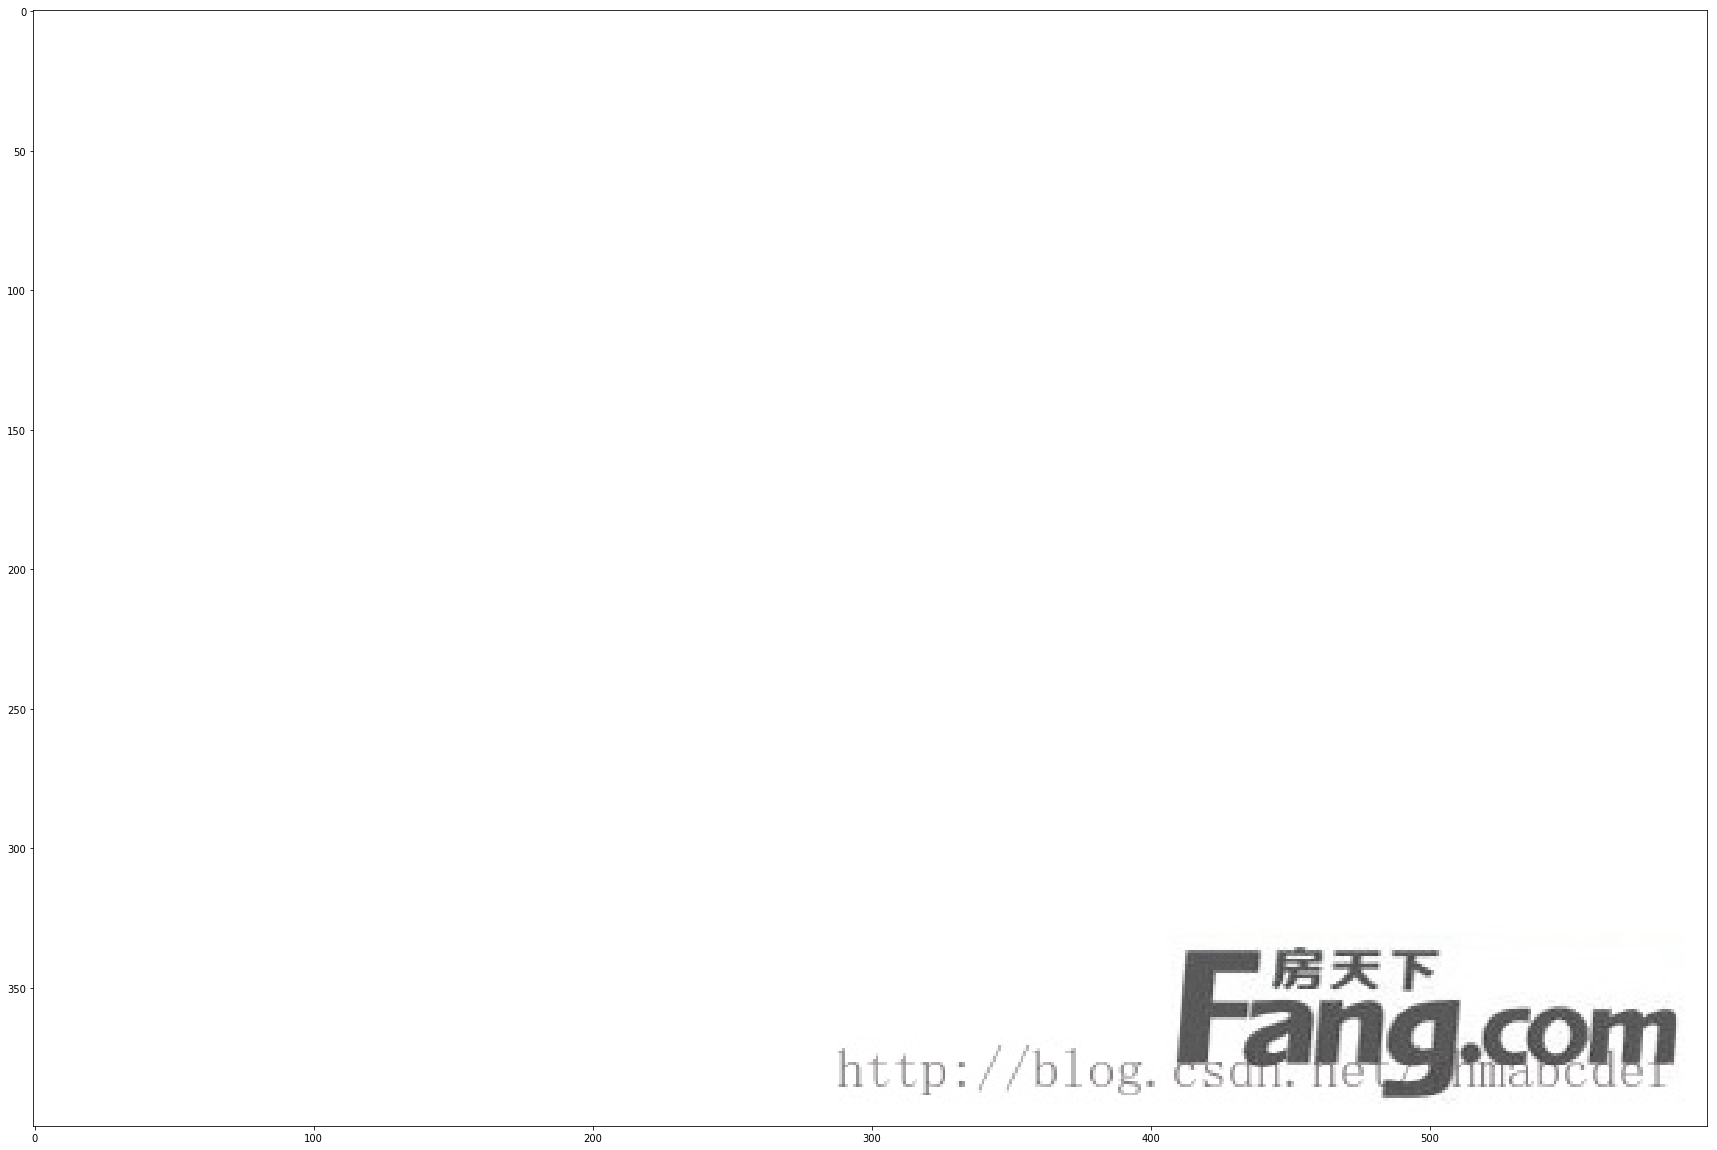

In [5]:
#function three
mask = cv2.imread("/Users/jarvis/Documents/workspace/shuiyin/soufang_shuiyin.jpg")
print(mask.shape)
fanse_image = inverse_color(mask)
plt.gcf().set_size_inches(30,25)
plt.imshow(fanse_image)


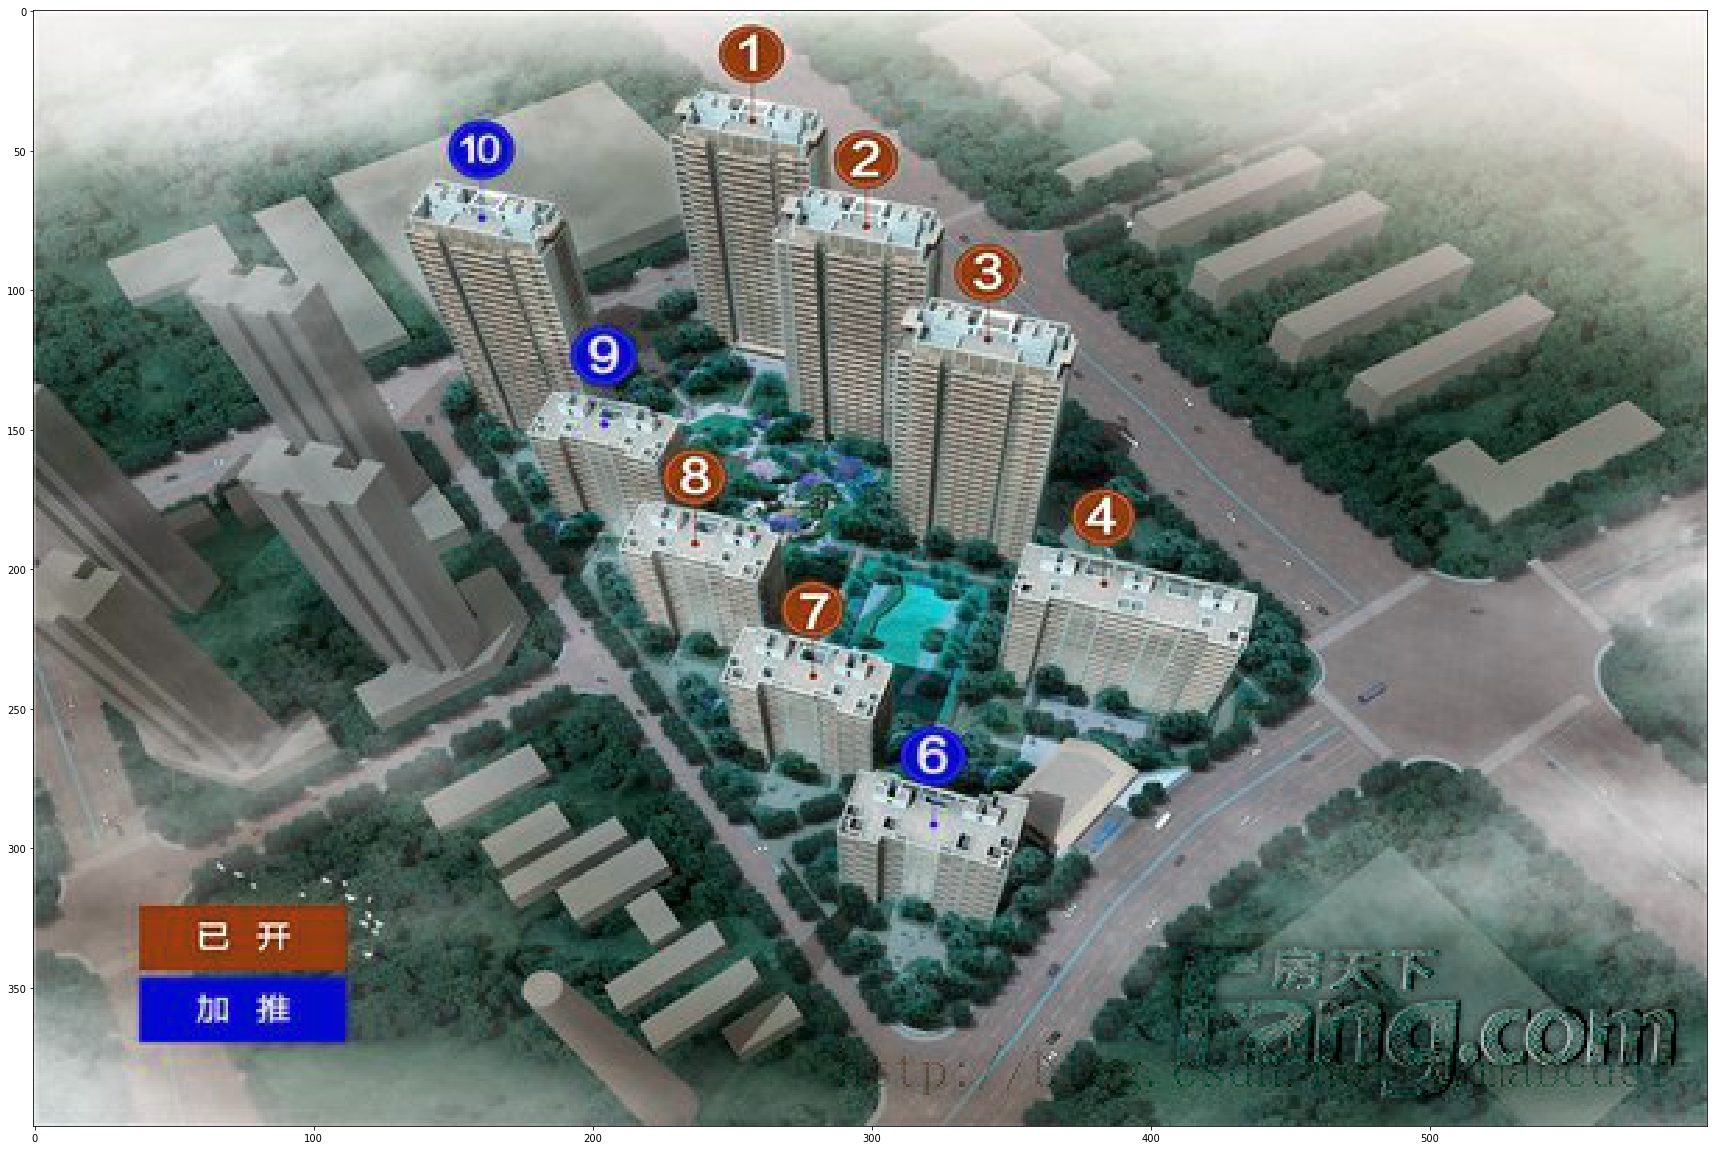

In [57]:
qushuiyin = qushuiyin(fanse_image)

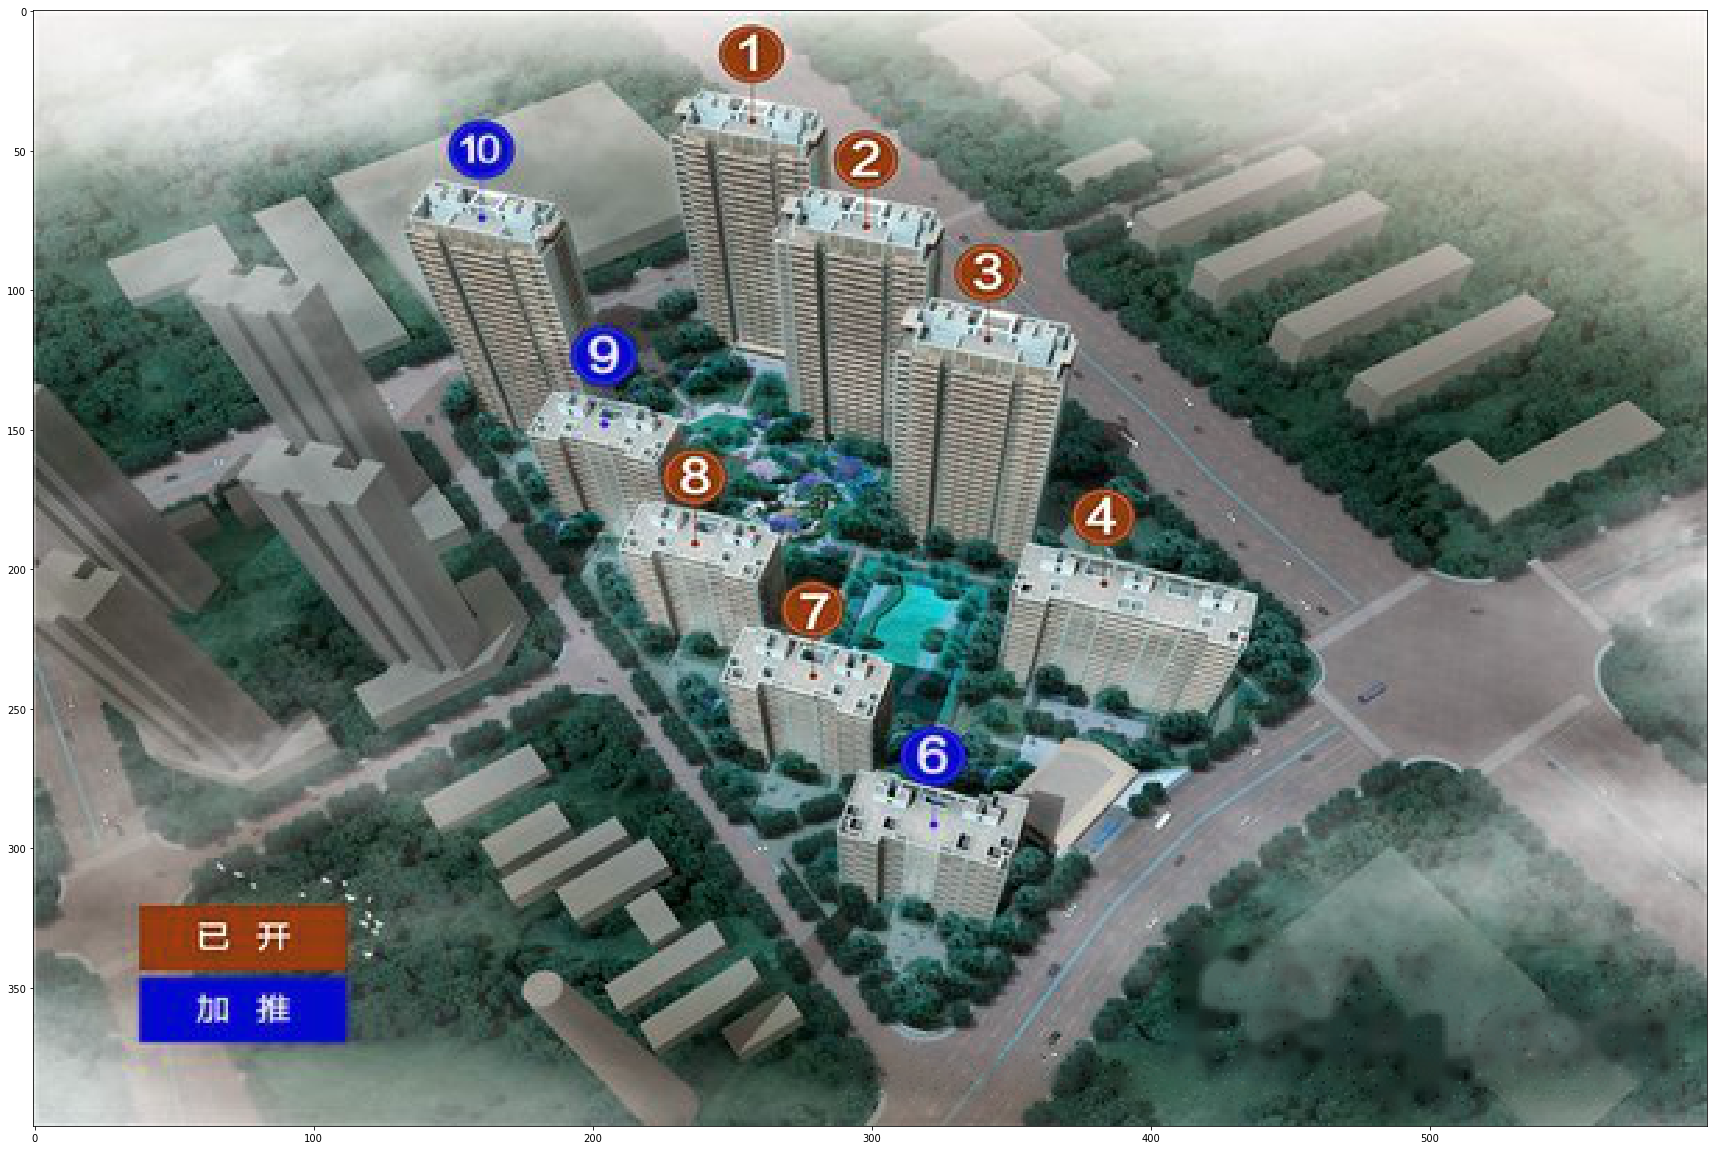

In [58]:
mask1 = cv2.imread("/Users/jarvis/Documents/workspace/shuiyin/soufang_shuiyin.jpg", cv2.IMREAD_GRAYSCALE)
qushuiyin = qushuiyinfunctionone(mask=mask1,src=qushuiyin)
